In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder

import statsmodels.graphics.tsaplots as sgt
import scipy.stats as stats

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

# отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_validate

le = LabelEncoder()
# from catboost import CatBoostClassifier, Pool
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from functools import partial
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
# from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
# fmin - основная функция, она будет минимизировать наш функционал
# tpe - алгоритм оптимизации
# hp - включает набор методов для объявления пространства поиска гиперпараметров
# trails - используется для логирования результатов

%matplotlib inline
sns.set_context("talk")

# random state
RS = 1
# %matplotlib widget

ТЗ: При разработке модели необходимо проверить, возможно ли обучить ее на данных предыдущих пилотов для последующего их использования новыми пилотами;

In [52]:
table_1 = pd.read_pickle('/home/user/Загрузки/table_1') 
table_2 = pd.read_pickle('/home/user/Загрузки/table_2') 
table_3 = pd.read_pickle('/home/user/Загрузки/table_3') 
table_4 = pd.read_pickle('/home/user/Загрузки/table_4') 

In [53]:
table_1.head()

,0,1,2,3,4,5,6,7,8,9,...,ENC1,ENC2,ENC3,ENC4,ENC5,BUTTON,SYNC,ts,gest,name
0,6,3,11,2455,3160,1,1573,7,4,1,...,0,0,0,0,0,0,0,129186,0.0,12-24
1,6,0,12,2454,3158,1,1574,8,12,6,...,0,0,0,0,0,0,0,129219,0.0,12-24
2,10,2,13,2461,3165,1,1579,9,5,4,...,0,0,0,0,0,0,0,129252,0.0,12-24
3,5,4,10,2453,3160,11,1575,8,12,5,...,0,0,0,0,0,0,0,129285,0.0,12-24
4,7,3,15,2454,3157,1,1575,8,8,2,...,0,0,0,0,0,0,0,129318,0.0,12-24


In [54]:
table_1['gest'].value_counts()

gest
0.0    103628
1.0     13266
5.0     13246
4.0     13238
3.0     13228
2.0     13184
Name: count, dtype: int64

In [55]:
scaler = StandardScaler()

In [56]:
table_1.drop(columns = ['ENC1','ENC2','ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'], inplace=True)

table_1_0 = table_1[table_1['gest'] == 0.0]
table_1_1 = table_1[table_1['gest'] == 1.0]
table_1_2 = table_1[table_1['gest'] == 2.0]
table_1_3 = table_1[table_1['gest'] == 3.0]
table_1_4 = table_1[table_1['gest'] == 4.0]
table_1_5 = table_1[table_1['gest'] == 5.0]

cols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'ACC0', 'ACC1', 'ACC2', 'GYR0', 'GYR1', 'GYR2', 'ENC0']
table_1_0.loc[:, 'sum']= np.abs(table_1_0[cols]).diff().sum(axis=1)
table_1_1.loc[:, 'sum']= np.abs(table_1_1[cols]).diff().sum(axis=1)
table_1_2.loc[:, 'sum']= np.abs(table_1_2[cols]).diff().sum(axis=1)
table_1_3.loc[:, 'sum']= np.abs(table_1_3[cols]).diff().sum(axis=1)
table_1_4.loc[:, 'sum']= np.abs(table_1_4[cols]).diff().sum(axis=1)
table_1_5.loc[:, 'sum']= np.abs(table_1_5[cols]).diff().sum(axis=1)
table_1_0.drop(columns =cols, inplace = True)

In [58]:
table_1_0['name'].value_counts()

name
16-08    18898
12-24    18862
12-38    13295
43-11    13278
30-15    13178
53-01    13065
34-17    13052
Name: count, dtype: int64

<AxesSubplot:>

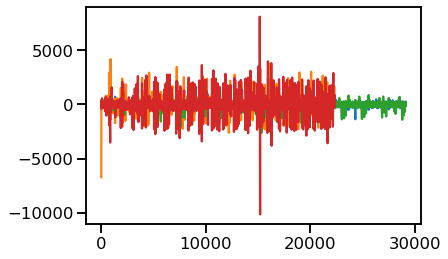

In [59]:
table_1_0[table_1_0['name'] == '12-24']['sum'].plot()
table_1_0[table_1_0['name'] == '30-15']['sum'].plot()
table_1_0[table_1_0['name'] == '16-08']['sum'].plot()
table_1_0[table_1_0['name'] == '43-11']['sum'].plot()

## DBSCAN

In [60]:
dbscan = DBSCAN()

In [61]:
table_1_0['prediction_dbscan_1'] = dbscan.fit_predict(table_1_0['sum'].values.reshape(-1, 1))
table_1_1['prediction_dbscan_1'] = dbscan.fit_predict(table_1_1['sum'].values.reshape(-1, 1))
table_1_2['prediction_dbscan_1'] = dbscan.fit_predict(table_1_2['sum'].values.reshape(-1, 1))
table_1_3['prediction_dbscan_1'] = dbscan.fit_predict(table_1_3['sum'].values.reshape(-1, 1))
table_1_4['prediction_dbscan_1'] = dbscan.fit_predict(table_1_4['sum'].values.reshape(-1, 1))
table_1_5['prediction_dbscan_1'] = dbscan.fit_predict(table_1_5['sum'].values.reshape(-1, 1))
table_1_0.head()

,gest,name,sum,prediction_dbscan_1
0,0.0,12-24,0.0,0
1,0.0,12-24,72.0,1
2,0.0,12-24,18.0,2
3,0.0,12-24,-6.0,3
4,0.0,12-24,31.0,4


# 1 пилот

In [62]:
table_dbscan_1 = pd.concat([table_1_0,table_1_1,table_1_2,table_1_3,table_1_4,table_1_5], ignore_index= True)
table_dbscan_1[table_dbscan_1.prediction_dbscan_1 < 0]['name'].value_counts()

name
43-11    1718
34-17    1675
30-15    1376
53-01    1019
16-08     879
12-38     829
12-24     476
Name: count, dtype: int64

# 2 пилот

In [63]:
table_2.drop(columns = ['ENC1','ENC2','ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'], inplace=True)
table_2 = table_2[:120000]

table_2_0 = table_2[table_2['gest'] == 0.0][:100000]
table_2_1 = table_2[table_2['gest'] == 1.0][:100000]
table_2_2 = table_2[table_2['gest'] == 2.0][:100000]
table_2_3 = table_2[table_2['gest'] == 3.0][:100000]
table_2_4 = table_2[table_2['gest'] == 4.0][:100000]
table_2_5 = table_2[table_2['gest'] == 5.0][:100000]

table_2_0.loc[:, 'sum']= np.abs(table_2_0[cols]).diff().sum(axis=1)
table_2_1.loc[:, 'sum']= np.abs(table_2_1[cols]).diff().sum(axis=1)
table_2_2.loc[:, 'sum']= np.abs(table_2_2[cols]).diff().sum(axis=1)
table_2_3.loc[:, 'sum']= np.abs(table_2_3[cols]).diff().sum(axis=1)
table_2_4.loc[:, 'sum']= np.abs(table_2_4[cols]).diff().sum(axis=1)
table_2_5.loc[:, 'sum']= np.abs(table_2_5[cols]).diff().sum(axis=1)
table_2_0.drop(columns =cols, inplace = True)

table_2_0['prediction_dbscan_2'] = dbscan.fit_predict(table_2_0['sum'].values.reshape(-1, 1))
table_2_1['prediction_dbscan_2'] = dbscan.fit_predict(table_2_1['sum'].values.reshape(-1, 1))
table_2_2['prediction_dbscan_2'] = dbscan.fit_predict(table_2_2['sum'].values.reshape(-1, 1))
table_2_3['prediction_dbscan_2'] = dbscan.fit_predict(table_2_3['sum'].values.reshape(-1, 1))
table_2_4['prediction_dbscan_2'] = dbscan.fit_predict(table_2_4['sum'].values.reshape(-1, 1))
table_2_5['prediction_dbscan_2'] = dbscan.fit_predict(table_2_5['sum'].values.reshape(-1, 1))

table_dbscan_2 = pd.concat([table_2_0,table_2_1,table_2_2,table_2_3,table_2_4,table_2_5], ignore_index= True) 

print(table_dbscan_2[table_dbscan_2.prediction_dbscan_2 < 0]['name'].value_counts())

table_2 = pd.read_pickle('/home/user/Загрузки/table_2')
table_2.drop(columns = ['ENC1','ENC2','ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'], inplace=True)
table_2 = table_2[120001:250000]

table_2_0 = table_2[table_2['gest'] == 0.0]
table_2_1 = table_2[table_2['gest'] == 1.0]
table_2_2 = table_2[table_2['gest'] == 2.0]
table_2_3 = table_2[table_2['gest'] == 3.0]
table_2_4 = table_2[table_2['gest'] == 4.0]
table_2_5 = table_2[table_2['gest'] == 5.0]

table_2_0.loc[:, 'sum']= np.abs(table_2_0[cols]).diff().sum(axis=1)
table_2_1.loc[:, 'sum']= np.abs(table_2_1[cols]).diff().sum(axis=1)
table_2_2.loc[:, 'sum']= np.abs(table_2_2[cols]).diff().sum(axis=1)
table_2_3.loc[:, 'sum']= np.abs(table_2_3[cols]).diff().sum(axis=1)
table_2_4.loc[:, 'sum']= np.abs(table_2_4[cols]).diff().sum(axis=1)
table_2_5.loc[:, 'sum']= np.abs(table_2_5[cols]).diff().sum(axis=1)
table_2_0.drop(columns =cols, inplace = True)

table_2_0['prediction_dbscan_2'] = dbscan.fit_predict(table_2_0['sum'].values.reshape(-1, 1))
table_2_1['prediction_dbscan_2'] = dbscan.fit_predict(table_2_1['sum'].values.reshape(-1, 1))
table_2_2['prediction_dbscan_2'] = dbscan.fit_predict(table_2_2['sum'].values.reshape(-1, 1))
table_2_3['prediction_dbscan_2'] = dbscan.fit_predict(table_2_3['sum'].values.reshape(-1, 1))
table_2_4['prediction_dbscan_2'] = dbscan.fit_predict(table_2_4['sum'].values.reshape(-1, 1))
table_2_5['prediction_dbscan_2'] = dbscan.fit_predict(table_2_5['sum'].values.reshape(-1, 1))

table_dbscan_2 = pd.concat([table_2_0,table_2_1,table_2_2,table_2_3,table_2_4,table_2_5], ignore_index= True)
# table_dbscan_2 = pd.concat([table_2_0, table_2_2,table_2_3,table_2_4,table_2_5], ignore_index= True)

table_dbscan_2[table_dbscan_2.prediction_dbscan_2 < 0]['name'].value_counts()

name
04-02    2831
04-29    2311
22-01    2188
59-23    1194
44-02     904
55-22     642
52-30     364
23-02     264
Name: count, dtype: int64


name
03-50    1713
14-05    1677
20-47    1422
06-44    1413
14-41    1135
46-37     769
55-22     609
11-45     475
08-46     397
16-21     280
07-13     276
05-29     108
Name: count, dtype: int64

# 3 пилот

In [64]:
table_3.drop(columns = ['ENC1','ENC2','ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'], inplace=True)

table_3_0 = table_3[table_3['gest'] == 0.0]
table_3_1 = table_3[table_3['gest'] == 1.0]
table_3_2 = table_3[table_3['gest'] == 2.0]
table_3_3 = table_3[table_3['gest'] == 3.0]
table_3_4 = table_3[table_3['gest'] == 4.0]
table_3_5 = table_3[table_3['gest'] == 5.0]

table_3_0.loc[:, 'sum']= np.abs(table_3_0[cols]).diff().sum(axis=1)
table_3_1.loc[:, 'sum']= np.abs(table_3_1[cols]).diff().sum(axis=1)
table_3_2.loc[:, 'sum']= np.abs(table_3_2[cols]).diff().sum(axis=1)
table_3_3.loc[:, 'sum']= np.abs(table_3_3[cols]).diff().sum(axis=1)
table_3_4.loc[:, 'sum']= np.abs(table_3_4[cols]).diff().sum(axis=1)
table_3_5.loc[:, 'sum']= np.abs(table_3_5[cols]).diff().sum(axis=1)
table_3_0.drop(columns =cols, inplace = True)

table_3_0['prediction_dbscan_3'] = dbscan.fit_predict(table_3_0['sum'].values.reshape(-1, 1))
table_3_1['prediction_dbscan_3'] = dbscan.fit_predict(table_3_1['sum'].values.reshape(-1, 1))
table_3_2['prediction_dbscan_3'] = dbscan.fit_predict(table_3_2['sum'].values.reshape(-1, 1))
table_3_3['prediction_dbscan_3'] = dbscan.fit_predict(table_3_3['sum'].values.reshape(-1, 1))
table_3_4['prediction_dbscan_3'] = dbscan.fit_predict(table_3_4['sum'].values.reshape(-1, 1))
table_3_5['prediction_dbscan_3'] = dbscan.fit_predict(table_3_5['sum'].values.reshape(-1, 1))

table_dbscan_3 = pd.concat([table_3_0,table_3_1,table_3_2,table_3_3,table_3_4,table_3_5], ignore_index= True)

table_dbscan_3[table_dbscan_3.prediction_dbscan_3 < 0]['name'].value_counts()

name
train    3656
54-27    3126
19-05    1739
17-00    1544
Name: count, dtype: int64

# 4 пилот

In [65]:
table_4.drop(columns = ['ENC1','ENC2','ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'], inplace=True)

table_4_0 = table_4[table_4['gest'] == 0.0]
table_4_1 = table_4[table_4['gest'] == 1.0]
table_4_2 = table_4[table_4['gest'] == 2.0]
table_4_3 = table_4[table_4['gest'] == 3.0]
table_4_4 = table_4[table_4['gest'] == 4.0]
table_4_5 = table_4[table_4['gest'] == 5.0]

table_4_0.loc[:, 'sum']= np.abs(table_4_0[cols]).diff().sum(axis=1)
table_4_1.loc[:, 'sum']= np.abs(table_4_1[cols]).diff().sum(axis=1)
table_4_2.loc[:, 'sum']= np.abs(table_4_2[cols]).diff().sum(axis=1)
table_4_3.loc[:, 'sum']= np.abs(table_4_3[cols]).diff().sum(axis=1)
table_4_4.loc[:, 'sum']= np.abs(table_4_4[cols]).diff().sum(axis=1)
table_4_5.loc[:, 'sum']= np.abs(table_4_5[cols]).diff().sum(axis=1)
table_4_0.drop(columns =cols, inplace = True)

table_4_0['prediction_dbscan_4'] = dbscan.fit_predict(table_4_0['sum'].values.reshape(-1, 1))
table_4_1['prediction_dbscan_4'] = dbscan.fit_predict(table_4_1['sum'].values.reshape(-1, 1))
table_4_2['prediction_dbscan_4'] = dbscan.fit_predict(table_4_2['sum'].values.reshape(-1, 1))
table_4_3['prediction_dbscan_4'] = dbscan.fit_predict(table_4_3['sum'].values.reshape(-1, 1))
table_4_4['prediction_dbscan_4'] = dbscan.fit_predict(table_4_4['sum'].values.reshape(-1, 1))
table_4_5['prediction_dbscan_4'] = dbscan.fit_predict(table_4_5['sum'].values.reshape(-1, 1))

table_dbscan_4 = pd.concat([table_4_0,table_4_1,table_4_2,table_4_3,table_4_4,table_4_5], ignore_index= True)

table_dbscan_4[table_dbscan_4.prediction_dbscan_4 < 0]['name'].value_counts()

name
57-30    5232
Name: count, dtype: int64

Вывод:
С помощью метода DBSCAN больше всего аномалий обнаружилось в наблюдениях 2023-05-05_17-57-30.palm (5232), 2023-04-18_19-08-47 gestures train.palm(3656), 2023-05-07_16-54-27.palm(3126), 2023-05-19_12-04-02.palm(2831). 

## Агломеративная кластеризация

In [ ]:
# table_1 = pd.read_pickle('/home/user/Загрузки/table_1') 
# table_2 = pd.read_pickle('/home/user/Загрузки/table_2') 
# table_3 = pd.read_pickle('/home/user/Загрузки/table_3') 
# table_4 = pd.read_pickle('/home/user/Загрузки/table_4') 

# table_1.drop(columns = ['ENC1','ENC2','ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'], inplace=True)

# table_1_0 = table_1[table_1['gest'] == 0.0]
# table_1_1 = table_1[table_1['gest'] == 1.0]
# table_1_2 = table_1[table_1['gest'] == 2.0]
# table_1_3 = table_1[table_1['gest'] == 3.0]
# table_1_4 = table_1[table_1['gest'] == 4.0]
# table_1_5 = table_1[table_1['gest'] == 5.0]

# cols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
#        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
#        '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
#        '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
#        '49', 'ACC0', 'ACC1', 'ACC2', 'GYR0', 'GYR1', 'GYR2', 'ENC0']
# table_1_0.loc[:, 'sum']= scaler.fit_transform(table_1_0[cols]).sum(axis=1)
# table_1_1.loc[:, 'sum']= scaler.fit_transform(table_1_1[cols]).sum(axis=1)
# table_1_2.loc[:, 'sum']= scaler.fit_transform(table_1_2[cols]).sum(axis=1)
# table_1_3.loc[:, 'sum']= scaler.fit_transform(table_1_3[cols]).sum(axis=1)
# table_1_4.loc[:, 'sum']= scaler.fit_transform(table_1_4[cols]).sum(axis=1)
# table_1_5.loc[:, 'sum']= scaler.fit_transform(table_1_5[cols]).sum(axis=1)
# table_1_0.drop(columns =cols, inplace = True)

In [ ]:
# table_1_0['sum'] = table_1_0['sum'].astype(int)
# table_1_0

In [ ]:
# agglom = AgglomerativeClustering()

In [ ]:
# table_1_0['sum'] = table_1_0['sum'].astype(int)
# table_1_0['prediction_agglom_1'] = agglom.fit_predict(table_1_0['sum'].values.reshape(-1, 1))
# table_1_1['prediction_agglom_1'] = agglom.fit_predict(table_1_1['sum'].values.reshape(-1, 1))
# table_1_2['prediction_agglom_1'] = agglom.fit_predict(table_1_2['sum'].values.reshape(-1, 1))
# table_1_3['prediction_agglom_1'] = agglom.fit_predict(table_1_3['sum'].values.reshape(-1, 1))
# table_1_4['prediction_agglom_1'] = agglom.fit_predict(table_1_4['sum'].values.reshape(-1, 1))
# table_1_5['prediction_agglom_1'] = agglom.fit_predict(table_1_5['sum'].values.reshape(-1, 1))
# table_1_0.head()

In [ ]:
# table_agglom_1 = pd.concat([table_1_0,table_1_1,table_1_2,table_1_3,table_1_4,table_1_5], ignore_index= True)

In [ ]:
# valcount = table_agglom_1['prediction_agglom_1'].value_counts()
# valcount = set(valcount[valcount == 1].index)
# table_agglom_1[table_agglom_1.prediction_agglom_1.isin(valcount)]['name'].value_counts()

# KMeans

In [ ]:
table_1 = pd.read_pickle('/home/user/Загрузки/table_1') 
table_2 = pd.read_pickle('/home/user/Загрузки/table_2') 
table_3 = pd.read_pickle('/home/user/Загрузки/table_3') 
table_4 = pd.read_pickle('/home/user/Загрузки/table_4') 

table_1.drop(columns = ['ENC1','ENC2','ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'], inplace=True)

le = LabelEncoder()
table_1['name'] = le.fit_transform(table_1['name'])
table_2['name'] = le.fit_transform(table_2['name'])
table_3['name'] = le.fit_transform(table_3['name'])
table_4['name'] = le.fit_transform(table_4['name'])

table_1_0 = table_1[table_1['gest'] == 0.0]
table_1_1 = table_1[table_1['gest'] == 1.0]
table_1_2 = table_1[table_1['gest'] == 2.0]
table_1_3 = table_1[table_1['gest'] == 3.0]
table_1_4 = table_1[table_1['gest'] == 4.0]
table_1_5 = table_1[table_1['gest'] == 5.0]

cols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'ACC0', 'ACC1', 'ACC2', 'GYR0', 'GYR1', 'GYR2', 'ENC0']
table_1.loc[:, 'sum']= scaler.fit_transform(table_1[cols]).sum(axis=1)
table_2.loc[:, 'sum']= scaler.fit_transform(table_2[cols]).sum(axis=1)
table_3.loc[:, 'sum']= scaler.fit_transform(table_3[cols]).sum(axis=1)
table_4.loc[:, 'sum']= scaler.fit_transform(table_4[cols]).sum(axis=1)

table_1.loc[:, 'sum']= np.abs(table_1[cols]).diff().sum(axis=1)
table_2.loc[:, 'sum']= np.abs(table_1[cols]).diff().sum(axis=1)
table_3.loc[:, 'sum']= np.abs(table_1[cols]).diff().sum(axis=1)
table_4.loc[:, 'sum']= np.abs(table_1[cols]).diff().sum(axis=1)

table_1.drop(columns=cols, inplace = True)
table_2.drop(columns=cols, inplace = True)
table_3.drop(columns=cols, inplace = True)
table_4.drop(columns=cols, inplace = True)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169790 entries, 0 to 22360
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   gest    169790 non-null  float64
 1   name    169790 non-null  int64  
 2   sum     169790 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 5.2 MB


In [ ]:
# Уменьшим количество компонент
pca = PCA(n_components=2)
data = pca.fit_transform(table_1)

min_max_scaler = MinMaxScaler().fit(data)
np_scaled = min_max_scaler.transform(data)
data = pd.DataFrame(np_scaled).fillna(0)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa5882b4e50>
Traceback (most recent call last):
  File "/home/user/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/user/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/user/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/user/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa5885621f0>
Traceback (most recent call last):
  File "/home/user/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/user/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/user/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/user/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

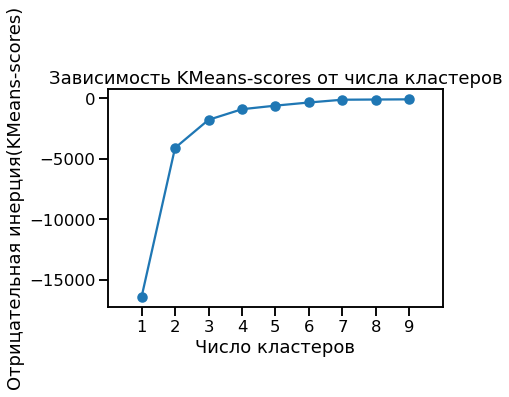

In [ ]:
# создаем список количества кластеров 1-19
n_cluster = range(1, 10)
#подберем оптимальное число кластеров k-means
#для этого обучим алгоритм KMeans для заданных чисел кластеров
kmeans = [KMeans(n_clusters=j).fit(data) for j in n_cluster]
# получим отрицательную инерцию(score) для разных значений кластеров
scores = [km.score(data) for km in kmeans]

#Подберём число кластеров
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)

ax.scatter(n_cluster, scores)

ax.set(xlim=(0, 10), xticks=np.arange(1, 10))

plt.title("Зависимость KMeans-scores от числа кластеров")
plt.xlabel("Число кластеров")
plt.ylabel("Отрицательная инерция(KMeans-scores)")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4).fit(data)

In [ ]:
# кластеризуем подготовленные данные
table_1['cluster'] = kmeans.predict(data)

# разделим главные компоненты
table_1['principal_feature1'] = data[0]
table_1['principal_feature2'] = data[1]

# определим количество наблюдений в каждом кластере
table_1['cluster'].value_counts()

cluster
0    46055
1    44579
2    44561
3    34595
Name: count, dtype: int64

In [ ]:
table_1

,gest,name,sum,cluster,principal_feature1,principal_feature2
0,0.0,0,0.0,0,0.451989,0.001262
1,0.0,0,72.0,0,0.456868,0.001407
2,0.0,0,18.0,0,0.453209,0.001298
3,0.0,0,-6.0,0,0.451582,0.001249
4,0.0,0,31.0,0,0.454090,0.001324
...,...,...,...,...,...,...
22356,2.0,3,52.0,2,0.441689,0.000954
22357,2.0,3,222.0,2,0.462967,0.076945
22358,2.0,3,32.0,2,0.448194,0.076504
22359,2.0,3,348.0,2,0.447855,0.076493


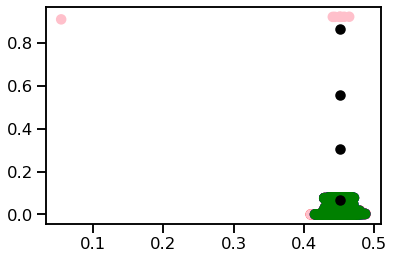

In [ ]:
# визуализируем полученные кластеры
fig, ax = plt.subplots()
# data5 = data.iloc[7262:7264,:]
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(table_1['principal_feature1'], table_1['principal_feature2'], c=table_1["cluster"].apply(lambda x: colors[x]))
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'black')
plt.show()

In [ ]:
# Несколько вспомогательных методов

def getDistanceByPoint(data, model):
    """Расчет расстояний от точек до центров кластеров

    Args:
        data (DataFrame): подготовленные данные
        model (sklearn.cluster.KMeans): обученная модель KMeans

    Returns:
       Series: Список расстояний до центров кластеров
    """
    # список расстояний
    distance = []
    # для каждого наблюдения
    for i in range(0,len(data)):
        # координаты признака данного наблюдения
        Xa = np.array(data.loc[i])
        # координаты центра кластера данного наблюдения
        Xb = model.cluster_centers_[model.labels_[i]]
        # рассчитываем норму(длину) вектора от исходной точки до центра кластера
        distance.append(np.linalg.norm(Xa-Xb))
    distance = pd.Series(distance)
    return distance

In [ ]:
data

,0,1
0,0.451989,0.001262
1,0.456868,0.001407
2,0.453209,0.001298
3,0.451582,0.001249
4,0.454090,0.001324
...,...,...
169785,0.455513,0.491794
169786,0.467033,0.492138
169787,0.454157,0.491754
169788,0.475571,0.492394


In [ ]:
# определим дистанции от точек до центров соседних кластеров
distance = getDistanceByPoint(data, kmeans)
# доля выбросов
outliers_fraction = 0.2
# количество выбросов
number_of_outliers = int(outliers_fraction*len(distance))
# минимальное значение из 72 наибольших значений дистанции
threshold = distance.nlargest(number_of_outliers).min()

# Считаем точку аномалией, если расстояние до центра кластера больше порога
table_1['anomaly21'] = (distance >= threshold).astype(int)

# # визуализируем аномалии на точечном графике
# fig, ax = plt.subplots()
# colors = {0:'blue', 1:'red'}
# # окрашиваем точки в зависимости от того, аномалия это или нет
# ax.scatter(table_1['principal_feature1'], table_1['principal_feature2'], c=table_1["anomaly21"].apply(lambda x: colors[x]))
# ax.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], c = 'black')
# plt.show()
# # визуализируем аномалии на точечном графике
# fig, ax = plt.subplots()
# a = table_1.loc[table_1['anomaly21'] == 1, ['sum']] #данные об аномальных наблюдениях


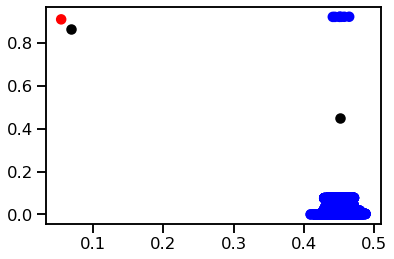

In [ ]:
# визуализируем аномалии на точечном графике
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
# окрашиваем точки в зависимости от того, аномалия это или нет
ax.scatter(table_1['principal_feature1'], table_1['principal_feature2'], c=table_1["anomaly21"].apply(lambda x: colors[x]))
ax.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], c = 'black')
plt.show()

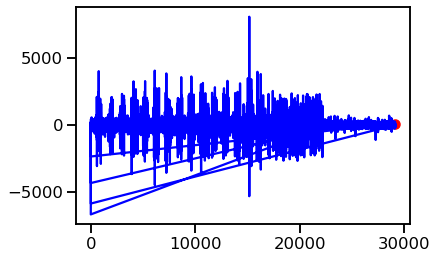

In [ ]:
fig, ax = plt.subplots()
a = table_1.loc[table_1['anomaly21'] == 1, ['sum']] #данные об аномальных наблюдениях
# линейный график наблюдений
ax.plot(table_1['sum'], color='blue')
# точечный график аномалий
ax.scatter(a.index, a['sum'], color='red')
plt.show()

In [ ]:
table_1[table_1['anomaly21'] == 1]['name'].value_counts()

name
2    1
Name: count, dtype: int64

# Метод Тьюки 

In [ ]:
table_1 = pd.read_pickle('/home/user/Загрузки/table_1') 
table_2 = pd.read_pickle('/home/user/Загрузки/table_2') 
table_3 = pd.read_pickle('/home/user/Загрузки/table_3') 
table_4 = pd.read_pickle('/home/user/Загрузки/table_4') 

table_1.drop(columns = ['ENC1','ENC2','ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'], inplace=True)

cols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'ACC0', 'ACC1', 'ACC2', 'GYR0', 'GYR1', 'GYR2', 'ENC0']

table_1.loc[:, 'sum']= np.abs(table_1[cols]).diff().sum(axis=1)
table_2.loc[:, 'sum']= np.abs(table_2[cols]).diff().sum(axis=1)
table_3.loc[:, 'sum']= np.abs(table_3[cols]).diff().sum(axis=1)
table_4.loc[:, 'sum']= np.abs(table_4[cols]).diff().sum(axis=1)


In [ ]:
from collections import Counter

def outliers_iqr(data, feature):
    name_outliers= []
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    name_outliers = Counter(outliers['name'])
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned, name_outliers.most_common(3)

# data = pd.DataFrame(data)
outliers_abs, cleaned, name_outliers = outliers_iqr(table_1, 'sum')
print(name_outliers)
print(f'Число выбросов по методу Тьюки: {outliers_abs.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

outliers_abs, cleaned, name_outliers = outliers_iqr(table_2, 'sum')
print(name_outliers)
print(f'Число выбросов по методу Тьюки: {outliers_abs.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

outliers_abs, cleaned, name_outliers = outliers_iqr(table_3, 'sum')
print(name_outliers)
print(f'Число выбросов по методу Тьюки: {outliers_abs.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

outliers_abs, cleaned, name_outliers = outliers_iqr(table_4, 'sum')
print(name_outliers)
print(f'Число выбросов по методу Тьюки: {outliers_abs.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

[('43-11', 1774), ('34-17', 1545), ('30-15', 1211)]
Число выбросов по методу Тьюки: 6835
Результирующее число записей: 162955


[('04-02', 4273), ('04-29', 3356), ('22-01', 2685)]
Число выбросов по методу Тьюки: 26693
Результирующее число записей: 225972
[('54-27', 2600), ('train', 2520), ('19-05', 1119)]
Число выбросов по методу Тьюки: 6895
Результирующее число записей: 70107
[('57-30', 1285)]
Число выбросов по методу Тьюки: 1285
Результирующее число записей: 25363


Вывод:
С помощью метода Тьюки больше всего аномалий обнаружилось в наблюдениях 2023-05-19_12-04-02.palm(4273), 2023-05-22_17-04-29.palm(3356), 2023-05-22_20-22-01.palm(2685), 2023-05-07_16-54-27.palm(2600), 